# BayesianSimulatedData1

Compare LDA, QDA, and NB for both schemes (compute accuracy on the testing
set) for fixed value ρ = 0.5 and different values of a = 0.1, 0.5, 1, 2, 3, 5. Repeat the
experiment for different train/test splits and generate boxplots showing the values of
accuracy for each method and each value of the parameter a. Save the results in the
file BayesianSimulatedData1.pdf


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from scipy.stats import norm
from sklearn.metrics import accuracy_score

from scheme_dataset import scheme1_dataset, scheme2_dataset

from LDA import LDA
from QDA import QDA
from NB import NB

np.random.seed(123)

In [2]:
a_values = [0.1, 0.5, 1, 2, 3, 5]
rho = 0.5
nr_experiments = 10
results = {"Experiment": [], "Schema": [], "a": [], "Model": [], "Accuracy": []} 
model_names = {"LDA": LDA(), "QDA": QDA(), "NB":NB()}

for experiment in range(nr_experiments): 
    for a in a_values: 
        # Define train and test dataset
        scheme1_train_X, scheme1_train_y = scheme1_dataset(a)
        scheme1_test_X, scheme1_test_y = scheme1_dataset(a)
        scheme2_train_X, scheme2_train_y = scheme2_dataset(a, rho)
        scheme2_test_X, scheme2_test_y = scheme2_dataset(a, rho)
        
        for model_name in model_names.keys(): 
            # Schema 1
            model = model_names[model_name]
            model.fit(scheme1_train_X, scheme1_train_y)
            model_predictions = model.predict(scheme1_test_X)
            model_acc = accuracy_score(scheme1_test_y, model_predictions)
            results["Experiment"].append(experiment)
            results["Schema"].append("Schema 1")
            results["a"].append(a)
            results["Model"].append(model_name)
            results["Accuracy"].append(model_acc)
            # Schema 2
            model = model_names[model_name]
            model.fit(scheme2_train_X, scheme2_train_y)
            model_predictions = model.predict(scheme2_test_X)
            model_acc = accuracy_score(scheme2_test_y, model_predictions)
            results["Experiment"].append(experiment)
            results["Schema"].append("Schema 2")
            results["a"].append(a)
            results["Model"].append(model_name)
            results["Accuracy"].append(model_acc)

results = pd.DataFrame(results)
results.head()

,Experiment,Schema,a,Model,Accuracy
0,0,Schema 1,0.1,LDA,0.531
1,0,Schema 2,0.1,LDA,0.587
2,0,Schema 1,0.1,QDA,0.531
3,0,Schema 2,0.1,QDA,0.686
4,0,Schema 1,0.1,NB,0.521


In [3]:
results.groupby(["Schema", "Model", "a"]).agg({"Accuracy": "mean"})

Accuracy
Schema   Model a            
Schema 1 LDA   0.1    0.5140
               0.5    0.6391
               1.0    0.7588
               2.0    0.9197
               3.0    0.9822
               5.0    0.9999
         NB    0.1    0.5162
               0.5    0.6381
               1.0    0.7580
               2.0    0.9180
               3.0    0.9825
               5.0    0.9999
         QDA   0.1    0.5167
               0.5    0.6396
               1.0    0.7575
               2.0    0.9190
               3.0    0.9825
               5.0    0.9999
Schema 2 LDA   0.1    0.5414
               0.5    0.6577
               1.0    0.7854
               2.0    0.9253
               3.0    0.9779
               5.0    0.9993
         NB    0.1    0.5015
               0.5    0.6416
               1.0    0.7840
               2.0    0.9257
               3.0    0.9788
               5.0    0.9990
         QDA   0.1    0.6629
               0.5    0.7035
               1.0    0.8025
               2.0    0.9359
               3.0    0.9895
               5.0    0.9999

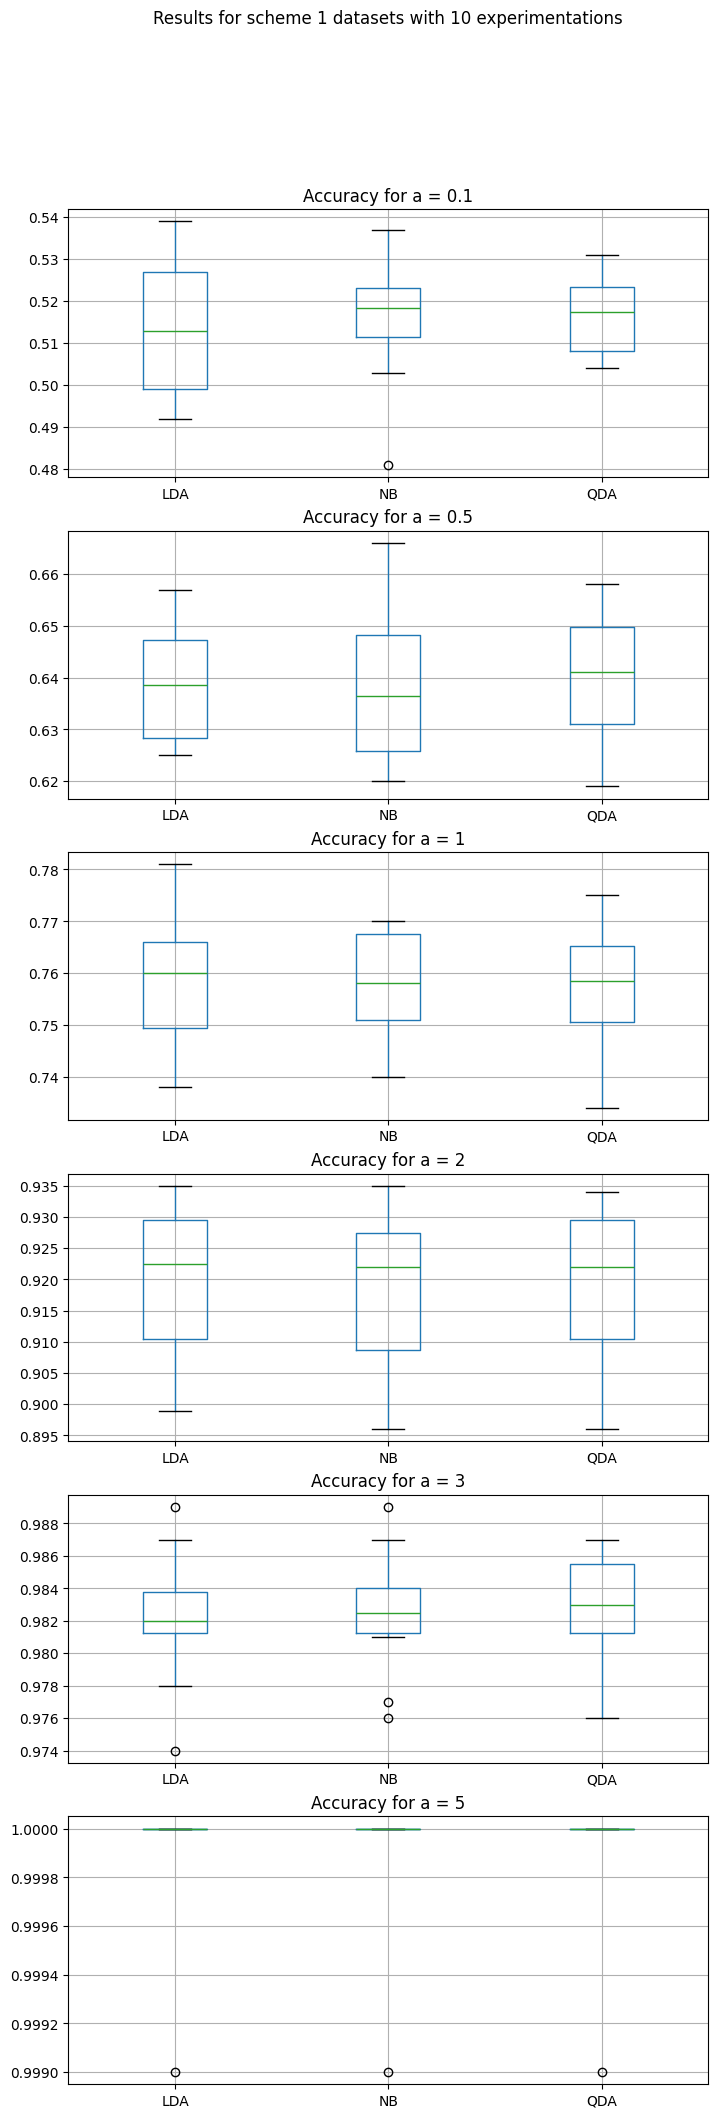

In [4]:
fig, axs = plt.subplots(len(a_values), 1, figsize=(8, 25))

for i, a in enumerate(a_values):
    res = results[results["Schema"] == "Schema 1"]
    res = res[res["a"] == a]
    res[["Accuracy", "Model"]].boxplot("Accuracy", "Model", ax=axs[i])
    axs[i].set_title(f"Accuracy for a = {a}")
    axs[i].set_xlabel("")

plt.suptitle("Results for scheme 1 datasets with 10 experimentations", fontsize=12)
plt.show()

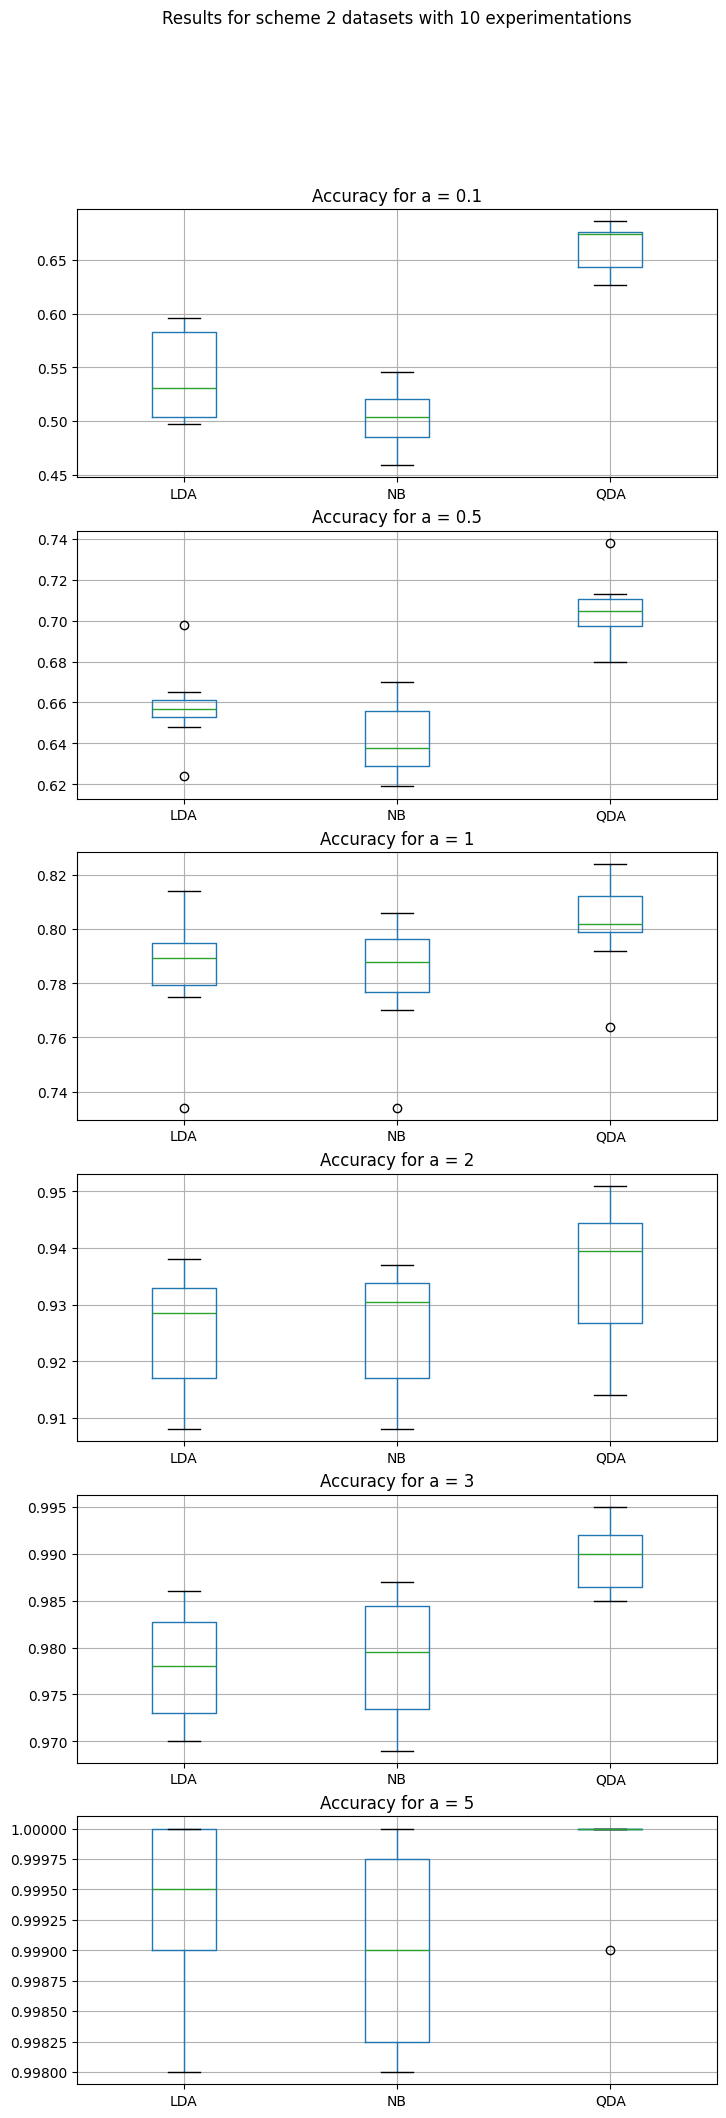

In [5]:
fig, axs = plt.subplots(len(a_values), 1, figsize=(8, 25))

for i, a in enumerate(a_values):
    res = results[results["Schema"] == "Schema 2"]
    res = res[res["a"] == a]
    res[["Accuracy", "Model"]].boxplot("Accuracy", "Model", ax=axs[i])
    
    axs[i].set_xlabel("")
    axs[i].set_title(f"Accuracy for a = {a}")

plt.suptitle("Results for scheme 2 datasets with 10 experimentations", fontsize=12)
plt.show()